In [33]:
import theano
import theano.tensor as T
import numpy as np

In [2]:
y = T.scalar()
x = T.scalar()


In [5]:
y = 3*(x**2) + 1
type(y)
print y

Elemwise{add,no_inplace}.0


In [7]:
theano.pprint(y)

'((TensorConstant{3} * (<TensorType(float32, scalar)> ** TensorConstant{2})) + TensorConstant{1})'

In [9]:
theano.printing.debugprint(y)

Elemwise{add,no_inplace} [id A] ''   
 |Elemwise{mul,no_inplace} [id B] ''   
 | |TensorConstant{3} [id C]
 | |Elemwise{pow,no_inplace} [id D] ''   
 |   |<TensorType(float32, scalar)> [id E]
 |   |TensorConstant{2} [id F]
 |TensorConstant{1} [id G]


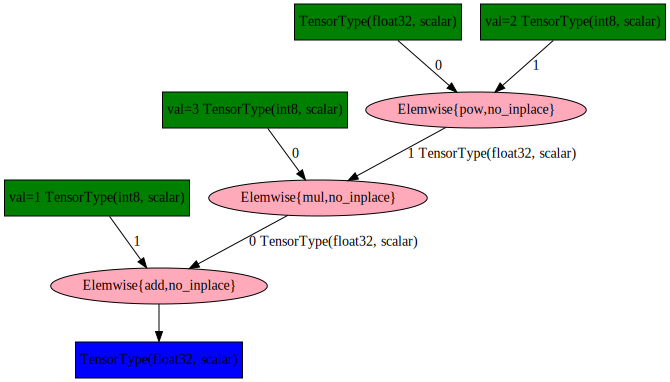

In [12]:
# graph
from IPython.display import SVG
SVG(theano.printing.pydotprint(y,return_image=True,format='svg'))

In [15]:
y.eval({x:2})

array(13.0, dtype=float32)

In [16]:
f = theano.function([x],y)

In [23]:
f(2)

array(13.0, dtype=float32)

In [26]:
def viz(f):
    return SVG(theano.printing.pydotprint(f,return_image=True,format='svg'))

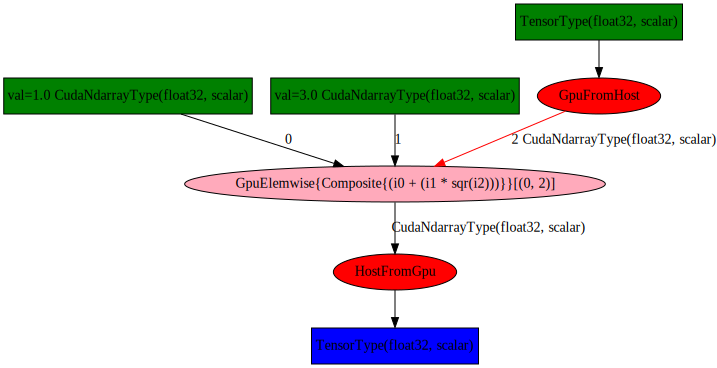

In [29]:
viz(f)

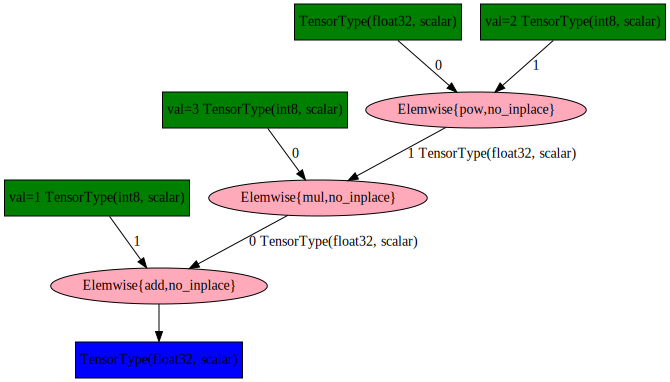

In [31]:
viz(y)

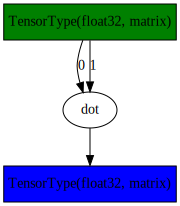

In [55]:
tX = T.matrix()
op = T.dot(tX,tX)
viz(op)

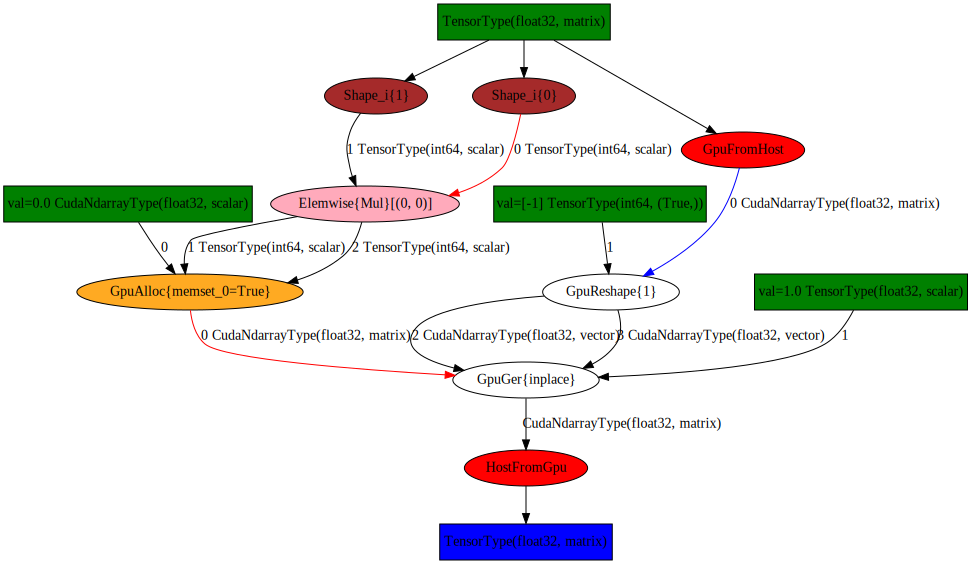

In [36]:
nf = theano.function([tX],op)
viz(nf)

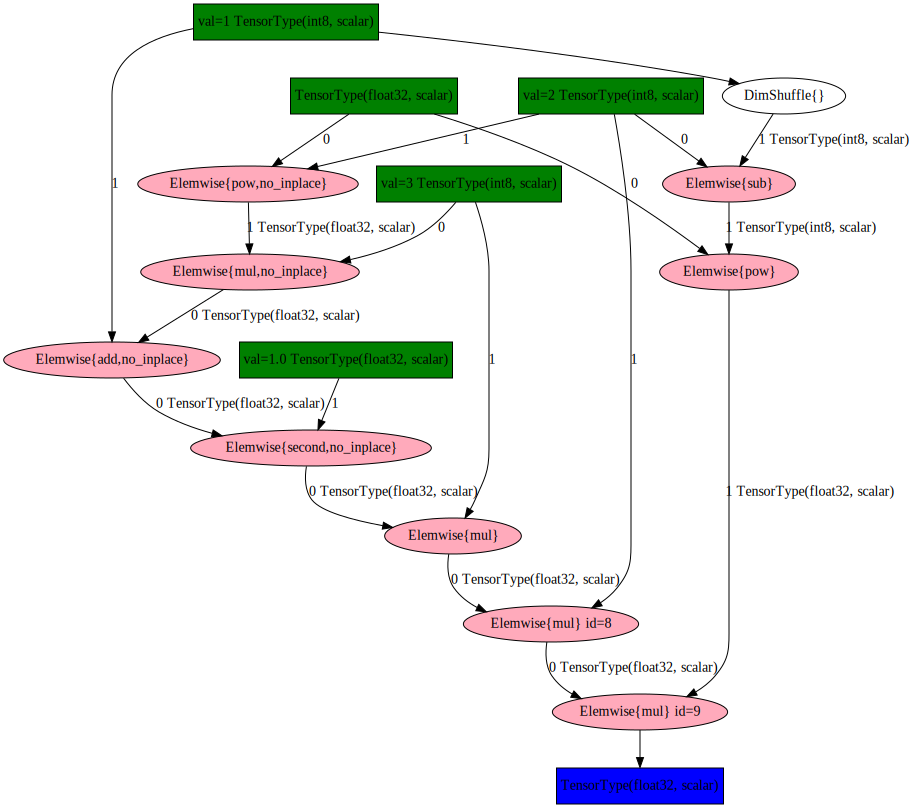

In [51]:
gradY = T.grad(y,x)
gradY.eval({x:2})
viz(gradY)

In [64]:
_Y = T.dot(_X,_X)
type(_Y)

theano.tensor.var.TensorVariable

In [67]:
_Y.eval()

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [75]:
# Updates
count = theano.shared(0.)
updates = {count : count +1}
f1 = theano.function([],count,updates=updates)


In [76]:
for _ in range(10):
    print f1()

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
